In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
def get_random_sentences(df, src, tgt, label='norm_dist'):
    bins = df.sort_values(label).bin.unique().tolist()
    sents = {}
    for b in bins:
        print(f'{b.left}-{b.right}\n')
        sampled = df[df['bin'] == b].sample(n=3)
        sents[b] = []
        for hu_idx, en_idx, sim in zip(sampled.src_idx,sampled.tgt_idx, sampled[label]):
            print(f'\t{sim}')
            print('\t' + src[hu_idx])
            print('\t' + tgt[en_idx])
            print('')
            sents[b].append((src[hu_idx], tgt[en_idx]))
    return sents

In [10]:
def plot_2x2_hist(run, key):
    fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
    for i, (name, df) in enumerate(dataframes[run].items()):
        x = i % 2
        y = (i // 2) % 2
        df[key].plot.hist(bins=40, xticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                     yticks=range(0, 100, 10), ax=axs[x,y], figsize=(12,8))
        axs[x, y].set_title(name)
    fig.tight_layout()
    axs[1, 0].sharex(axs[0, 0])

def plot_2x2_2hist(run1, run2, key1, key2):
    plt.style.use('seaborn-deep')
    fig, axs = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(12,8))
    for i, name in enumerate(dataframes[run1].keys()):
        x = i % 2
        y = (i // 2) % 2
        
        df1 = dataframes[run1][name]
        df2 = dataframes[run2][name]
        
        #axs[x, y].hist(df1[key1], bins=40, alpha=0.5, label=run1)
        #axs[x, y].hist(df2[key2], bins=40, alpha=0.5, label=run2)
        
        axs[x, y].hist([df1[key1], df2[key2]], bins=20, label=[run1,run2])

        axs[x, y].set_title(name)
        axs[x, y].set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        axs[x, y].set_yticks(range(0, 220, 20))
        axs[x, y].legend(loc='upper right')
    axs[1, 0].sharex(axs[0, 0])
    fig.tight_layout()

In [11]:
root_dir = 'data/similarity_test/'
hu_sent_file = 'data/similarity_test/sampled-1000.hu'
en_sent_file = 'data/similarity_test/sampled-1000.en'

base_dirs = next(os.walk(root_dir))[1]

filenames = {}
dataframes = {}

for base_dir in base_dirs:
    filenames[base_dir] = {}
    dataframes[base_dir] = {}
    for file in os.listdir(os.path.join(root_dir, base_dir)):
        name = file.replace('-', '_')[:-4]
        filename = os.path.join(root_dir, base_dir, file)
        filenames[base_dir][name] = filename
        dataframes[base_dir][name] = pd.read_csv(filename, sep=',')
        key = 'norm_dist' if 'norm_dist' in dataframes[base_dir][name] else 'jaccard'
        dataframes[base_dir][name]['bin'] = pd.cut(dataframes[base_dir][name][key], 5)       
        
        
with open(hu_sent_file, 'r') as f:
    hu_sents = f.readlines()
    hu_sents = [s.rstrip() for s in hu_sents]
with open(en_sent_file, 'r') as f:
    en_sents = f.readlines()
    en_sents = [s.rstrip() for s in en_sents]     

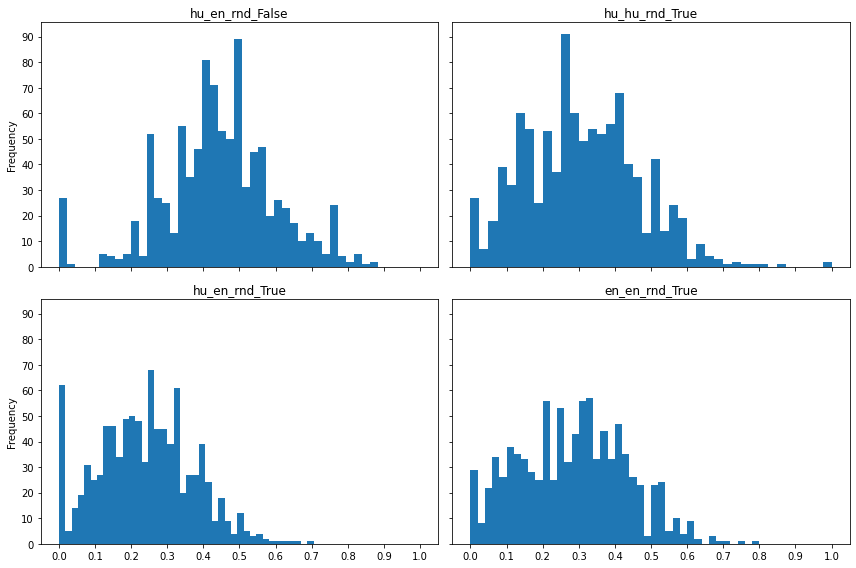

In [12]:
plot_2x2_hist('ged-2', 'norm_dist')

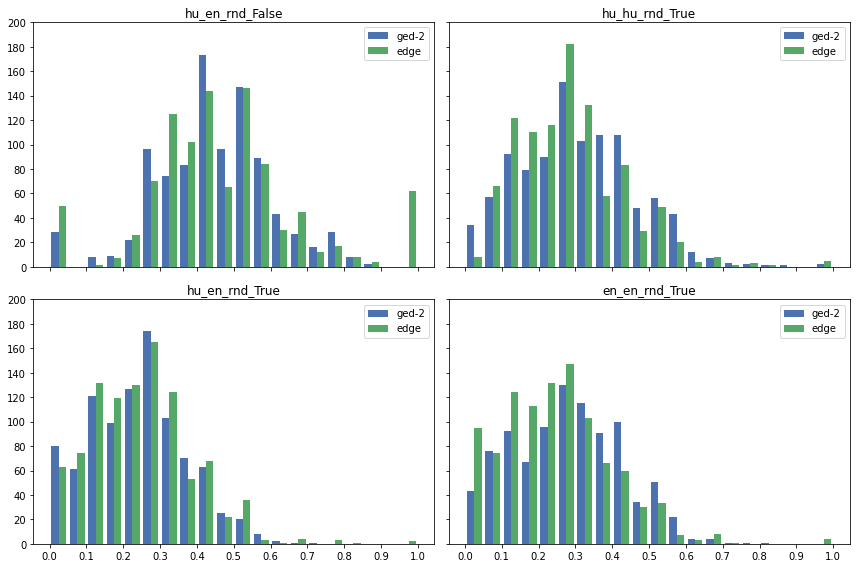

In [13]:
plot_2x2_2hist('ged-2', 'edge', 'norm_dist', 'jaccard')

In [14]:
with open(hu_sent_file, 'r') as f:
    hu_sents = f.readlines()
    hu_sents = [s.rstrip() for s in hu_sents]
with open(en_sent_file, 'r') as f:
    en_sents = f.readlines()
    en_sents = [s.rstrip() for s in en_sents]

# GED

## hu-en random pairs

<AxesSubplot:ylabel='Frequency'>

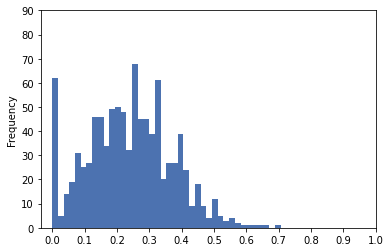

In [15]:
dataframes['ged-2']['hu_en_rnd_True'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                             yticks=range(0, 100, 10))

In [16]:
huen_rnd_sents = get_random_sentences(dataframes['ged-2']['hu_en_rnd_True'], hu_sents, en_sents)

-0.000706-0.141

	0.13636363636363635
	Értem?
	Karras saw the scratch marks on her face; the cuts on her lips where apparently shed bitten them.

	0.047619047619047616
	III-142. cikk
	He pinwheeled his arms madly and lunged ahead, his center of gravity dancing just beyond his nose.

	0.13636363636363635
	Mindenki rajtam akar segíteni.
	7 = Water line (between thermostat and column, inner diameter: approximately 8 mm)

0.141-0.282

	0.2272727272727273
	Teg rögtön leült a padlóra, amiből kiderült, hogy Odrade is gyakran alkalmazta ezt a technikát.
	The prohibition concerns any consideration, including payment, provision of guarantees, reservation of money on accounts, explicit acknowledgement of debt, etc.

	0.18181818181818185
	Hé, Grady, emlékszel az álmaidra?
	9,000 degrees.

	0.2380952380952381
	Zajlott az idény, zsúfolt volt a terem, s a két hölgy nagy fáradsággal bepréselődött.
	...big boy.

0.282-0.424

	0.2857142857142857
	Szóval ezt látta a nagyapám.
	Sir, where is your transpor

## hu-en translated pairs

<AxesSubplot:ylabel='Frequency'>

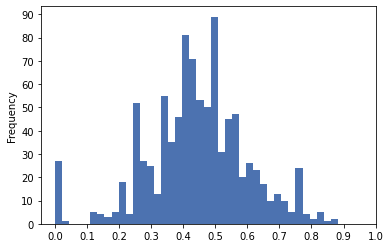

In [17]:
dataframes['ged-2']['hu_en_rnd_False'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                         yticks=range(0, 100, 10))

In [18]:
huen_sents = get_random_sentences(dataframes['ged-2']['hu_en_rnd_False'], hu_sents, en_sents)

-0.000882-0.176

	0.1111111111111111
	­ hüppögte.
	Im so, so sorry .

	0.0
	(2001. április 9.)
	of 9 April 2001

	0.14285714285714285
	Abszorpciós/deszorpciós szűrővizsgálat
	Absorption/desorption screening test

0.176-0.353

	0.25
	24. cikk
	Article 24

	0.3333333333333333
	2956/84),
	2956/84),

	0.25
	15. cikk
	Article 15

0.353-0.529

	0.4666666666666667
	A formulák értelme nem ez!
	That isnt what the formulas are at all!

	0.4117647058823529
	tekintettel az Európai Közösséget létrehozó szerződésre,
	Having regard to the Treaty establishing the European Community,

	0.4137931034482759
	6. ha a kétoldalú megállapodás úgy írja elő, biztosítja a fogadó egység szűrőjén átmenő ACT és REV közlemények automatikus elfogadását (a LAM helyett);
	when bilaterally agreed, provide the automatic acceptance of an ACT or REV message that has passed the filter in the accepting unit (in place of the LAM);

0.529-0.706

	0.6666666666666666
	Száddám Husszein elnöki titkára és főtanácsadója
	Saddams Pre

## hu random pairs

<AxesSubplot:ylabel='Frequency'>

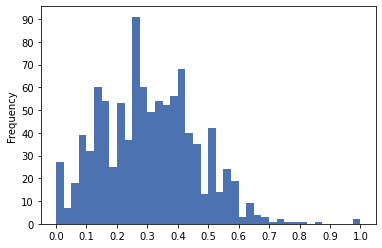

In [19]:
dataframes['ged-2']['hu_hu_rnd_True'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                           yticks=range(0, 100, 10))

In [20]:
hu_rnd_sents = get_random_sentences(dataframes['ged-2']['hu_hu_rnd_True'], hu_sents, hu_sents)

-0.001-0.2

	0.06451612903225806
	F. OKOZATI ÖSSZEFÜGGÉS 1.
	Nem, szellemekről szó sem lehet, de kellett lennie valaminek, ami éppen olyan iszonyatos és gonosz, mint a poklok legmélyebb bugyraiból felszálló ördögök.

	0.14285714285714285
	Az ICMP üzenetek jellemzően az adatcsomagok feldolgozása során jelentik a hibákat.
	2. cikk

	0.2
	Ő talán azt az időt várta, amikor Henry megint visszajön hozzá.
	Odalent.

0.2-0.4

	0.2222222222222222
	Vagy szomjas?
	pontos leírást ad a termékekről,

	0.375
	Ki vágta ezt hozzám?
	2956/84),

	0.39130434782608703
	Ezt a határozatot az Európai Közösségek Hivatalos Lapjában ki kell hirdetni.
	Visszatért Julien önéletrajzához, és hogy mennyire szerette volna látni.

0.4-0.6

	0.5
	Talán majd Geraldnak kell gondoskodnia Deirdre-ről, ha Carlotta is meghal.
	Szeretek a nagyival beszélni, de muszáj minden vasárnap ...

	0.5526315789473685
	Az egyik beledobta a gardeffijét a hátsó stabilizátoromba, amikor Mos Eisleyba tartottam a siklómmal jelentette ki Sigur

## en random pairs

<AxesSubplot:ylabel='Frequency'>

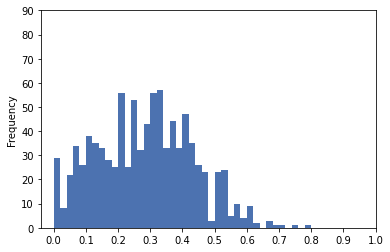

In [21]:
dataframes['ged-2']['en_en_rnd_True'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                           yticks=range(0, 100, 10))

In [22]:
en_rnd_sents = get_random_sentences(dataframes['ged-2']['en_en_rnd_True'], en_sents, en_sents)

-0.0008-0.16

	0.07142857142857142
	Christ, Andy!
	And he is a man with a wooden leg?

	0.047619047619047616
	Sodium, potassium and calcium salts of edible fatty acids with at least four carbon atoms/stearates 1.15.
	4.2.1.1.

	0.14285714285714285
	Aah.
	Ive accepted the ghola.

0.16-0.32

	0.1875
	5.1.2 .
	Its lonely here, said Constant, now that  He shook his head.

	0.2857142857142857
	Filthy creatures, he heard his wife say.
	I dont think so.

	0.26666666666666666
	(a) a description of the products concerned;
	Generating new key pair.

0.32-0.48

	0.4117647058823529
	(Jim) Its so forever,you know.
	Im answering your question, sir.

	0.3793103448275862
	Golovko inclined his head to the side.
	Buying a large vanilla cone, he found a secluded park bench, sat down, and started to lick.

	0.3636363636363637
	I followed them up and found they led to the hall window, where Boots had worn all the snow away while waiting.
	Hari signed, pointing over the distant ridge.

0.48-0.64

	0.5
	The 

# Edge Mapping

### hu-en translation pairs

In [23]:
huene_sents = get_random_sentences(dataframes['edge']['hu_en_rnd_False'], hu_sents, en_sents, 'jaccard')

-0.001-0.2

	0.03225806451612903
	Származási hely Név Cím Név Cím Név Cím Engedélyszám Engedélyszám Engedélyszám I.12. I.13.
	Place of origin Name Address Name Address Name Address Approval number Approval number Approval number I.12. I.13.

	0.2
	B. MEGÁLLAPÍTÁSOK 1.
	B. FINDINGS 1.

	0.0
	3. Az inszert kifejeződésére vonatkozó információk:
	3. Information on the expression of the insert:

0.2-0.4

	0.3888888888888889
	Mindezekben a kérdésekben most is csak feltevésekre voltam utalva.
	On these points, as before, I was left to my own conjectures.

	0.4
	Azért, a mindenségit, mert nem engedne be!
	Because, by the Galaxy, he wont let me!

	0.3
	Dupla ár plusz prémium.
	At double price, plus a bonus.

0.4-0.6

	0.5714285714285714
	Igazad van, Caesar.
	You are right, Caesar.

	0.5714285714285714
	Húztam minden erőmből.
	I pulled with all my might.

	0.5526315789473685
	A madaraktól tudtam, hogy Diggs pár perccel korábban elment, úgyhogy a rövidebb úton visszarohantam a házba, amelyben a s

In [24]:
corr_file = 'data/similarity_test/compare.csv'

df_corr = pd.read_csv(corr_file, sep=',')

In [25]:
df_corr

,src_idx,tgt_idx,src_size,tgt_size,max_dist,result,norm_dist,jaccard
0,1126,1126,18,19,70,28.0,0.600000,0.458333
1,277,277,3,3,8,1.0,0.875000,1.000000
2,1108,1108,5,8,22,9.0,0.590909,0.571429
3,580,580,24,29,102,44.0,0.568627,0.457143
4,1159,1159,30,34,124,47.0,0.620968,0.441860
...,...,...,...,...,...,...,...,...
1380,790,790,6,10,28,9.0,0.678571,0.555556
1381,1093,1093,15,16,58,21.0,0.637931,0.380952
1382,244,244,30,27,110,43.0,0.609091,0.486486
1383,1075,1075,10,11,38,10.0,0.736842,0.583333


In [26]:
df_corr['diff'] = df_corr.apply(lambda x: x.norm_dist - x.jaccard, axis=1)
df_corr

,src_idx,tgt_idx,src_size,tgt_size,max_dist,result,norm_dist,jaccard,diff
0,1126,1126,18,19,70,28.0,0.600000,0.458333,0.141667
1,277,277,3,3,8,1.0,0.875000,1.000000,-0.125000
2,1108,1108,5,8,22,9.0,0.590909,0.571429,0.019481
3,580,580,24,29,102,44.0,0.568627,0.457143,0.111485
4,1159,1159,30,34,124,47.0,0.620968,0.441860,0.179107
...,...,...,...,...,...,...,...,...,...
1380,790,790,6,10,28,9.0,0.678571,0.555556,0.123016
1381,1093,1093,15,16,58,21.0,0.637931,0.380952,0.256979
1382,244,244,30,27,110,43.0,0.609091,0.486486,0.122604
1383,1075,1075,10,11,38,10.0,0.736842,0.583333,0.153509


<AxesSubplot:>

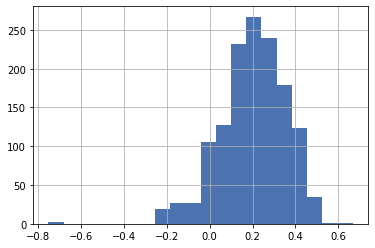

In [27]:
df_corr.sort_values('diff')['diff'].hist(bins=20)

In [28]:
df_corr.corr()

,src_idx,tgt_idx,src_size,tgt_size,max_dist,result,norm_dist,jaccard,diff
src_idx,1.000000,1.000000,-0.196744,-0.210190,-0.205919,-0.205558,0.141520,0.080593,0.010741
tgt_idx,1.000000,1.000000,-0.196744,-0.210190,-0.205919,-0.205558,0.141520,0.080593,0.010741
src_size,-0.196744,-0.196744,1.000000,0.957593,0.988494,0.927443,-0.486379,-0.243189,-0.081100
tgt_size,-0.210190,-0.210190,0.957593,1.000000,0.990157,0.953971,-0.561214,-0.280136,-0.094195
max_dist,-0.205919,-0.205919,0.988494,0.990157,1.000000,0.951346,-0.530898,-0.265201,-0.088847
result,-0.205558,-0.205558,0.927443,0.953971,0.951346,1.000000,-0.682421,-0.324243,-0.135973
norm_dist,0.141520,0.141520,-0.486379,-0.561214,-0.530898,-0.682421,1.000000,0.644443,-0.022111
jaccard,0.080593,0.080593,-0.243189,-0.280136,-0.265201,-0.324243,0.644443,1.000000,-0.778715
diff,0.010741,0.010741,-0.081100,-0.094195,-0.088847,-0.135973,-0.022111,-0.778715,1.000000
